In [31]:
# import the required libraries 

import requests
import math
import sys
import numpy 
import pandas 
import matplotlib 
import seaborn 
import scipy
import sklearn

print('Python: {}'. format(sys.version))
print('Numpy: {}'. format(numpy.__version__))
print('Pandas: {}'. format(pandas.__version__))
print('Matplotlib: {}'. format(matplotlib.__version__))
print('Seaborn: {}'. format(seaborn.__version__))
print('Scipy: {}'. format(scipy.__version__))
print('Sklearn: {}'. format(sklearn.__version__))



Python: 3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]
Numpy: 1.20.3
Pandas: 1.3.4
Matplotlib: 3.4.3
Seaborn: 0.11.2
Scipy: 1.7.1
Sklearn: 0.24.2


In [32]:
## More specific packages and as..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# using pandas load in the csv credit card dataset

data = pd.read_csv('creditcard.csv')

In [34]:
# data exploration
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [35]:
print(data.shape)

(284807, 31)


In [36]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [37]:
# more valid transactions than fraudalent transactions.
# cut down data, take a sample out of this data

data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(56961, 31)


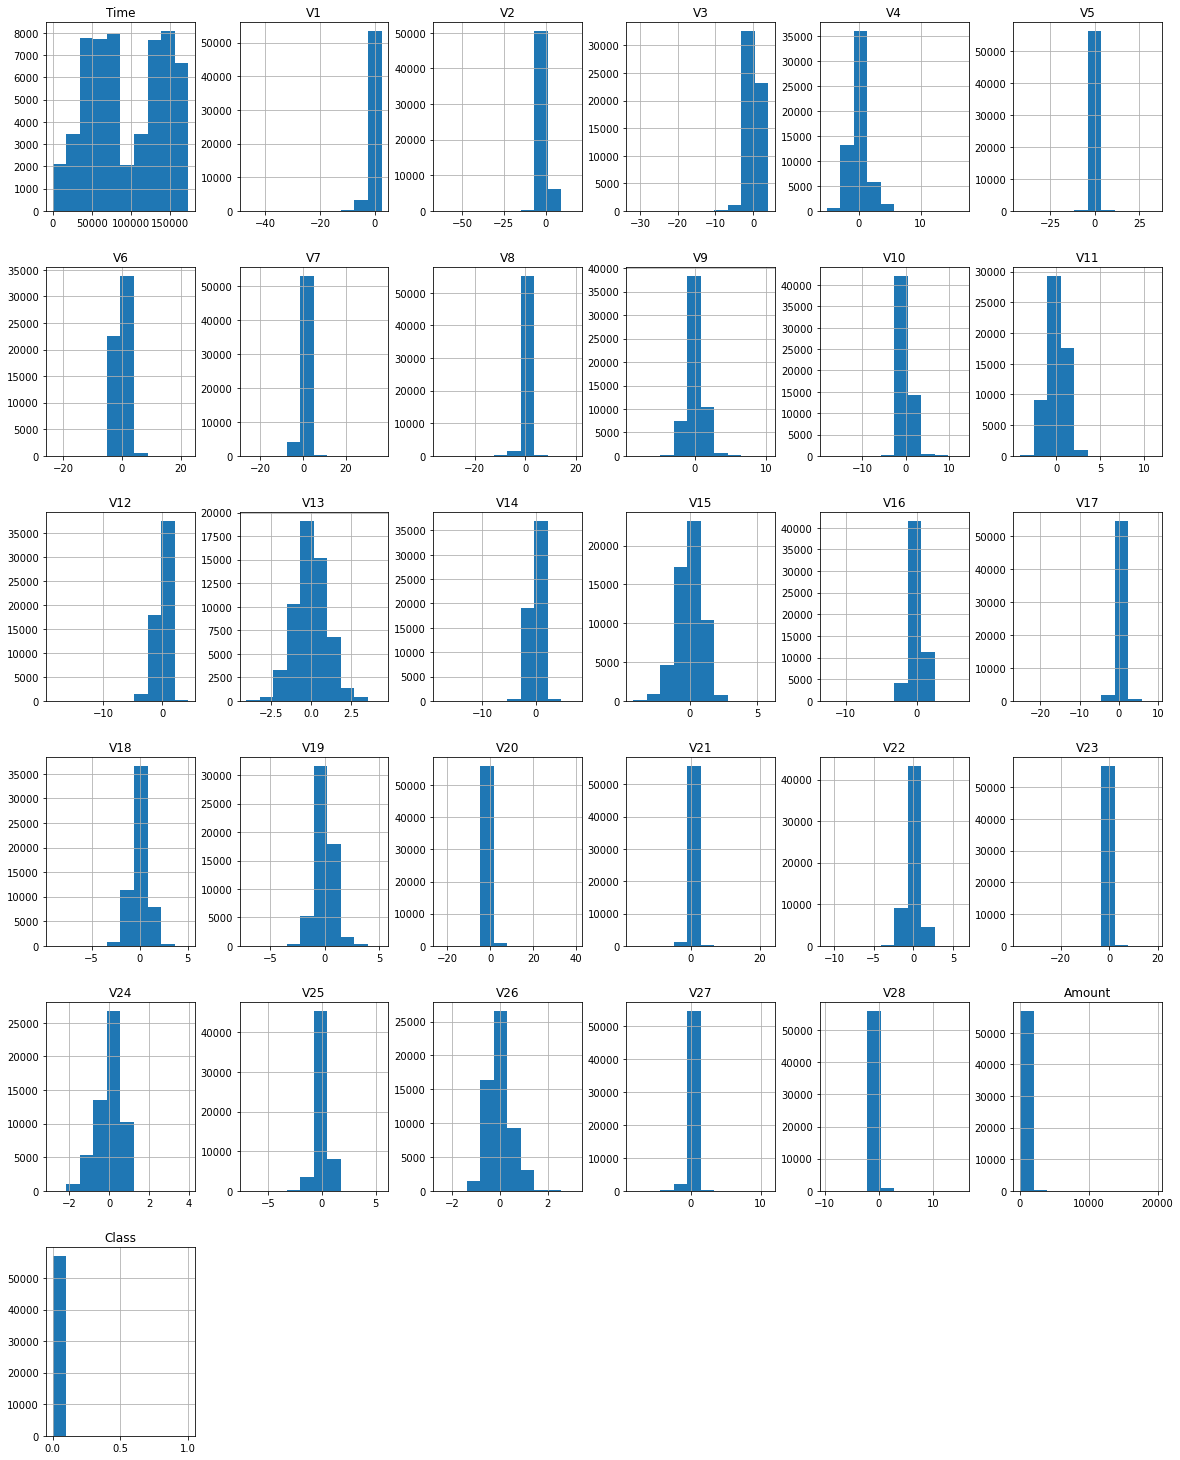

In [38]:
# plotting the descriptive statistics- plotting a histogram
data.hist(figsize = (20,26))
plt.show()

In [47]:
# calculating number of fraudulent cases and valid cases
Fraudulent = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraudulent) / float(len(Valid))
print(outlier_fraction)

print('Fraudulent Cases: {}'.format(len(Fraudulent)))
print('Valid Cases: {}'.format(len(Valid)))

0.0015296972254457222
Fraudulent Cases: 87
Valid Cases: 56874


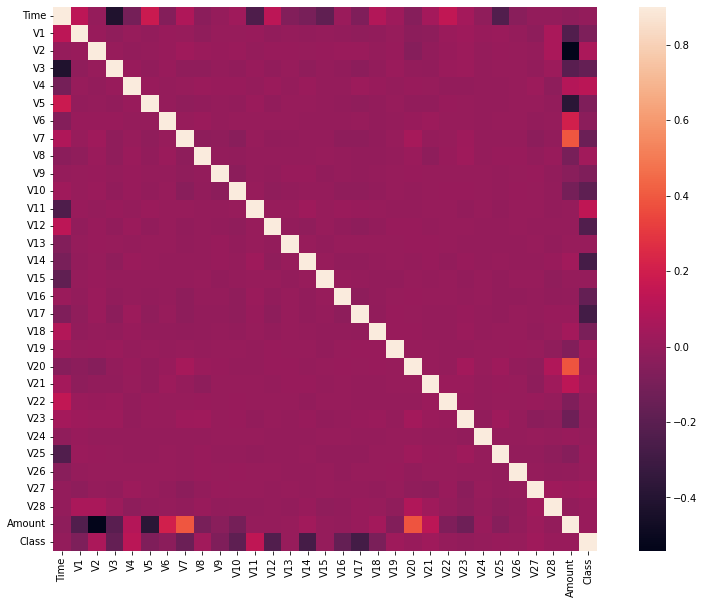

In [40]:
# huge disparity between fraudulent cases and valid cases
# will be hard to predict
# over representation of fraudulent cases used to train dataset may cause inaccurate results
# need to consider the ratio before building a neural network

# Building correlation matrix 

corrmat = data.corr()
fig = plt.figure(figsize= (15,10))
sns.heatmap(corrmat, vmax = .9, square = True)
plt.show()

In [41]:
# no real correlation between variables such as time and fraudulent cases

In [42]:
# obtain all columns from dataframe

columns = data.columns.tolist()

# remove unneccesary data 
columns = [c for c in columns if c not in ['Class']]

# storing the variable that is used for prediction

target = 'Class'

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)
                                          
                                           

(56961, 30)
(56961,)


In [43]:
### Data has been imported ###
### Data has been cleaned for any errors, duplicates###
### Data exploration completed ###

# Using Machine Learning Algorithm On Dataset 

In [44]:
# packages to predict outliers from extracted data sample
# 

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor # unsupervised outlier detection method which calculates anomaly score of each score


In [45]:
state = 1

In [49]:
classifiers = {'Isolation Forest': IsolationForest(max_samples=len(X), 
                                                   contamination = outlier_fraction, 
                                                   random_state = state),
              'Local Outlier Factor': LocalOutlierFactor(
                  n_neighbors = 20, 
                  contamination = outlier_fraction)}

In [68]:
# Fitting the model 

n_outlier = len(Fraudulent)
for i, (clf_name, clf) in enumerate (classifiers.items()):
    
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
        
        # reshaping the predictive values to 1 for Fraudulent and 0 for Valid
        
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
        
        n_errors = (y_pred !=Y).sum()
        
    # Running metrics for classification
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))
    
            
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)